In [1]:
import pandas as pd
import matplotlib.pyplot as plt

DATA_FILE_HUMAN = "../../data/prolific/data_long.csv"
DATA_FILE_MODEL = "../../data/results/model_results_long.csv"

df_human = pd.read_csv(DATA_FILE_HUMAN)
df_model = pd.read_csv(DATA_FILE_MODEL)

from plot_utils import *


In [2]:

def plot_model(data):
    """
    Plots the results for a given model. Adapted from Eric's function.
    """
    plt.rcParams["font.family"] = "Avenir"
    plt.rcParams["font.size"] = 24
    
    fig, ax = plt.subplots(figsize=(10, 5))
    
    bar_width = 0.35
    index = np.arange(len(data))
    
    for i, key in enumerate(data.keys()):
        # Calculate mean for '0' and '1' keys
        mean_0 = np.mean(data[key]['0'])
        mean_1 = np.mean(data[key]['1'])
        
        ax.bar(index[i] - bar_width / 2, mean_0, bar_width, label=f"{key} - 0", color='b')
        ax.bar(index[i] + bar_width / 2, mean_1, bar_width, label=f"{key} - 1", color='r')
    
    # Removing box
    sns.despine(left=True, bottom=False)
    plt.xlabel('')
    
    ax.set_yticks([0, 1, 2, 3, 4, 5])
    ax.set_xticks(index)
    ax.set_xticklabels(list(data.keys()))
    
    plt.tick_params(axis='x', pad=25) 
    
    ax.yaxis.grid(True, linestyle='-', which='major', color='lightgrey', alpha=0.5, zorder=-100)
    ax.set_ylabel('Average Rating')
    ax.yaxis.set_label_coords(-0.1, 0.4)
    plt.tick_params(axis='y', length=0)
    plt.ylim(0.005, 5.5)
    
    # Add legend if you like
    # plt.legend(title='', ncol=2, frameon=False)
    
    plt.show()

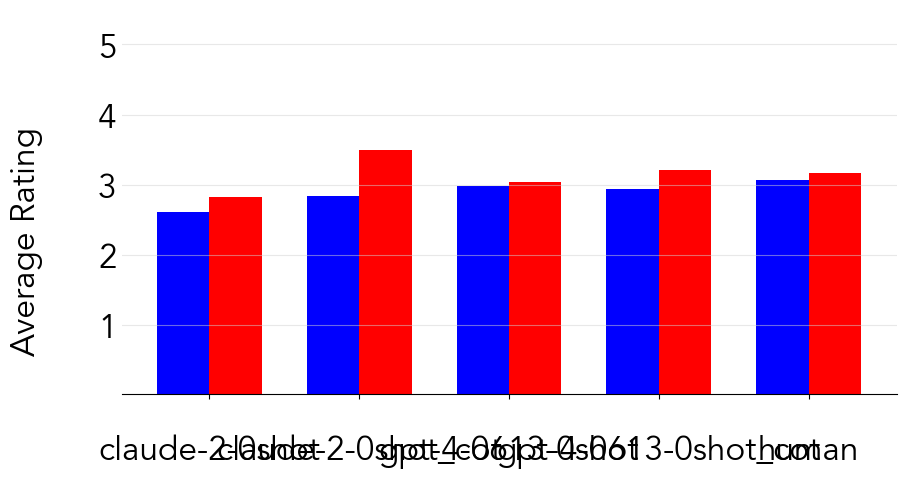

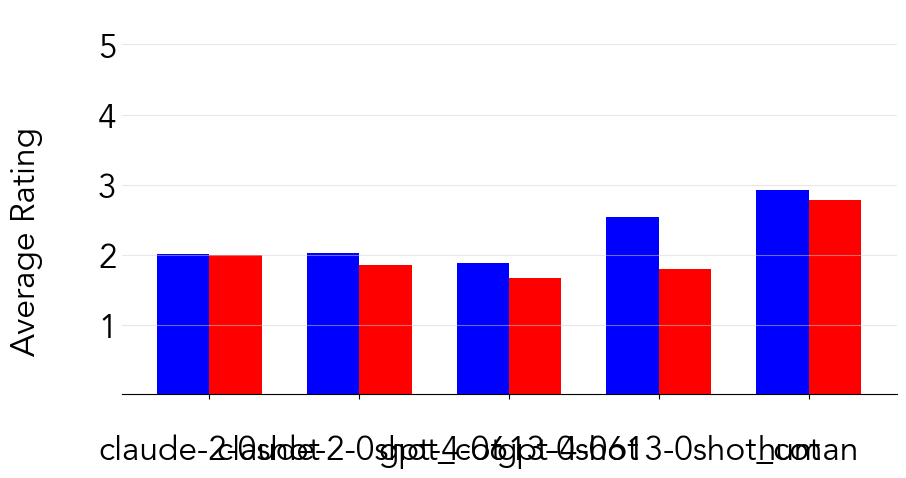

In [3]:
# Prepare data for "means vs side_effect" for permissibility ratings
data1 = prepare_data(df_model, df_human, 'evitability', ['evitable', 'inevitable'], 'permissibility_rating')
plot_model(data1)

# Prepare data for "action_yes vs prevention_no" for intention ratings
data2 = prepare_data(df_model, df_human, 'evitability', ['evitable', 'inevitable'], 'intention_rating')
plot_model(data2)
